### Data split using KFolds method and train_test_split

In [1]:
from sklearn import datasets
#from sklearn.cross_validation import 
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_val_score, cross_val_predict,ShuffleSplit,RepeatedKFold
import pandas as pd
from sklearn import metrics
import matplotlib.pylab as plt
import seaborn as sns

Load the boston dataset and extract the predictors and target data

In [2]:
# Load the boston dataset
data = datasets.load_boston()
print (data.DESCR)
# extract the predictors and target data.
predictors = data.data
target = data.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
predictors.shape, target.shape

((506, 13), (506,))

Split the data (80:20) into tarin and test using the train_test_split method

In [4]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.2)

In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

Define and train the model

In [6]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

C:\Users\gallastegi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [7]:
y_pred = rf_reg.predict(x_test)

In [8]:
rsqure_score = rf_reg.score(x_train,y_train)
print('R^2: {}'.format(rsqure_score))

R^2: 0.9798163853117822


### Perform the training using KFolds cross validation method

In [9]:
kfold = KFold(n_splits = 10, shuffle=True) # shuffle= true realizar los folds con datos aleatorios
kfold_r2_scores_rf = cross_val_score(rf_reg, predictors, target, cv=kfold,n_jobs=-1)
#cross_val_score(modelo, datos, objetivo, numero de segmentos, ejecunciones)
print(kfold_r2_scores_rf)
print("Mean 10-kfold R Squared: {} and variance: {}".format(np.mean(kfold_r2_scores_rf),np.var(kfold_r2_scores_rf)))

[0.91500399 0.95258186 0.86758793 0.87262694 0.71301836 0.52119487
 0.86412228 0.88151981 0.6899073  0.78869727]
Mean 10-kfold R Squared: 0.8066260612976025 and variance: 0.015421430456765434


### Perform the training using repeated Hold-out

In [10]:
shuffle = ShuffleSplit(n_splits = 10, test_size = 0.3)
shuffle_r2_scores_rf = cross_val_score(rf_reg, predictors, target, cv=shuffle,n_jobs=-1)
print(shuffle_r2_scores_rf)
print("Mean 10-shuffle R Squared: {} and standard dev: {}".format(np.mean(shuffle_r2_scores_rf),np.var(shuffle_r2_scores_rf)))

[0.81918854 0.85538848 0.85470067 0.86668212 0.8808893  0.74694619
 0.89444105 0.89091897 0.85674703 0.8454227 ]
Mean 10-shuffle R Squared: 0.8511325052498586 and standard dev: 0.0016556025101602764


### Perform the training using KFolds cross validation method

In [11]:
rep_kfold = RepeatedKFold(n_splits = 10, n_repeats = 10)
rep_kfold_r2_scores_rf = cross_val_score(rf_reg, predictors, target, cv=rep_kfold,n_jobs=-1)
print(rep_kfold_r2_scores_rf)
print("Mean 10-shuffle R Squared: {} and standard dev: {}".format(np.mean(rep_kfold_r2_scores_rf),np.var(rep_kfold_r2_scores_rf)))

[0.90126101 0.80446417 0.87648831 0.9046006  0.75006075 0.91416371
 0.8985235  0.73581318 0.91393933 0.75556899 0.73570233 0.95263017
 0.90574301 0.78628598 0.9123643  0.71192424 0.90917971 0.87567144
 0.85268552 0.92147919 0.9049412  0.82659848 0.75735903 0.67323894
 0.88750104 0.84849964 0.86686901 0.82153965 0.94811317 0.93369785
 0.86326928 0.62900881 0.9320617  0.80681578 0.89080371 0.83237048
 0.88166758 0.92877239 0.92722822 0.88785752 0.89815095 0.86968072
 0.91017852 0.70314999 0.92071881 0.65151507 0.87635788 0.77957155
 0.89252541 0.88491078 0.89580995 0.8874775  0.83591643 0.87236992
 0.75559576 0.89476083 0.76750369 0.83834888 0.86387145 0.81100186
 0.89159279 0.87084618 0.8919359  0.91447993 0.70350955 0.88847537
 0.93559353 0.85815897 0.85231845 0.81342359 0.85016679 0.89219353
 0.92586665 0.83723161 0.82865156 0.80486128 0.89903177 0.80297549
 0.83094777 0.88741399 0.85232626 0.88425733 0.78410535 0.90980023
 0.93642014 0.4651576  0.85454956 0.93331508 0.85825124 0.8494

### Perform the k-fold training manually on a dataframe using for loop

Defin the KFold class and train the model, notice parameter shuffle

In [12]:
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestRegressor()

Perform the training repeatedly on each k-1 folds (x_train, y_train) and use the Kth fold (x_test, y_test) for testing. Append the score from every iteration to the scores list.

In [13]:
scores = []
for train_idx,test_idx in kf.split(predictors):
    x_train, x_test = predictors[train_idx], predictors[test_idx]
    y_train, y_test = target[train_idx], target[test_idx]
    model = rf_reg.fit(x_train,y_train.ravel())
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.8241825306595437, 0.8634117312767726, 0.6863939855178929, 0.8580593191000494, 0.8923008443242783]
Average K-Fold Score : 0.8248696821757073


C:\Users\gallastegi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Perform the LOO training manually on a dataframe using for loop

In [14]:
from sklearn.metrics import r2_score
#r2score = r2_score(target,cross_val_predict(rf_reg,predictors,target,cv=predictors.shape[0],n_jobs=-1))
#print(r2score)

loo = LeaveOneOut()
ytests = []
ypreds = []
for train_index, test_index in loo.split(predictors):
    X_train, X_test = predictors[train_index], predictors[test_index]
    y_train, y_test = target[train_index],target[test_index]
    model = rf_reg.fit(X_train, y_train.ravel())
    predicted_y = model.predict(X_test)
    ytests.append(y_test[0])
    ypreds.append(predicted_y[0])
    
rr = metrics.r2_score(ytests, ypreds)
mae_error = metrics.mean_absolute_error(ytests, ypreds)
rms_error = np.sqrt(metrics.mean_squared_error(ytests, ypreds))

print("Leave One Out Cross Validation")
print("R^2: {:.5f}, RMSE: {:.5f}, MAE: {:.5f}".format(rr, rms_error,mae_error))
print("NRMSE: {:.5f}%".format((rms_error / (target.max()-target.min()))*100.0))

Leave One Out Cross Validation
R^2: 0.87509, RMSE: 3.24724, MAE: 2.21097
NRMSE: 7.21609%


### Plot predictions and residuals

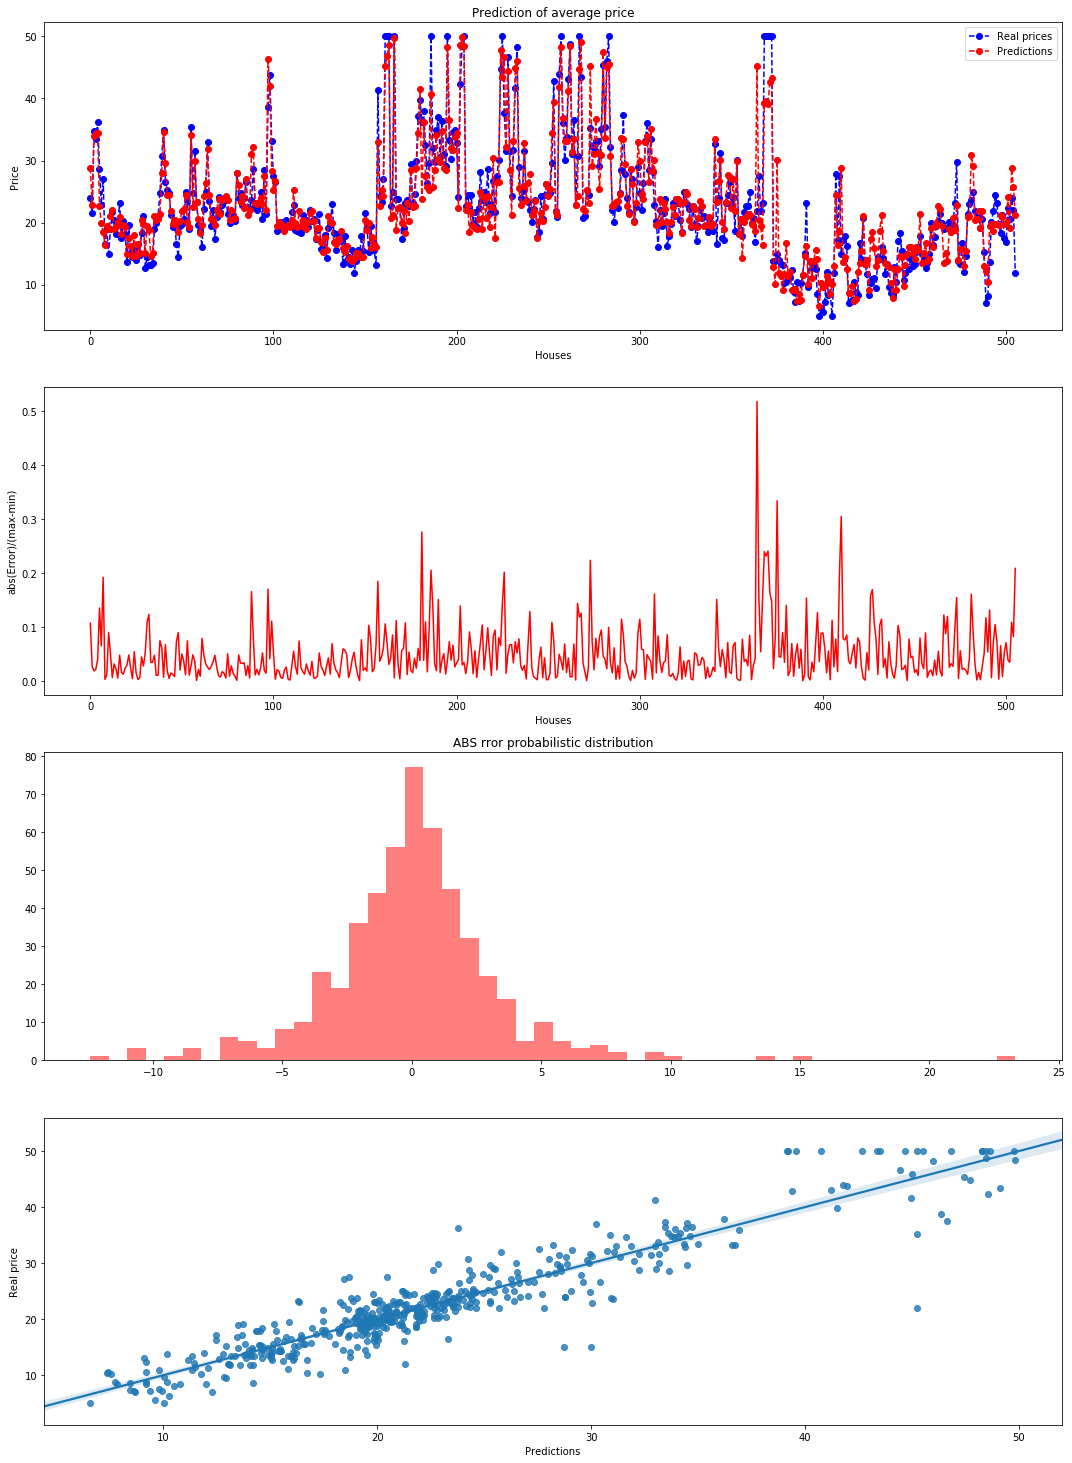

In [15]:
plt.figure(figsize=(15,20))

plt.subplot(411)
plt.title('Prediction of average price')

plt.plot(ytests, 'b--o', label='Real prices')
plt.plot(ypreds, 'r--o', label='Predictions')
plt.xlabel('Houses')
plt.ylabel('Price')
plt.legend()
plt.subplot(412)
diffs = [(yp-yr) for yp,yr in zip(ypreds,ytests)]
plt.plot(pd.DataFrame((np.abs(diffs)/ (np.max(ytests) - np.min(ytests)))).values , 'r')
plt.xlabel('Houses')
plt.ylabel('abs(Error)/(max-min)')
plt.subplot(413)
# plt.hist(np.subtract(array_real,array_forecast_tsne),bins = 300,color = 'g', alpha = 0.5)
plt.hist(diffs, bins=50, color='r', alpha=0.5)
# plt.hist(np.subtract(array_real,array_forecast_pca),bins = 300,color = 'r', alpha = 0.5)
plt.title('ABS rror probabilistic distribution')
plt.tight_layout()
plt.subplot(414)
sns.regplot(ypreds,ytests)
plt.xlabel('Predictions')
plt.ylabel('Real price')
plt.show()